In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('housepricedata.csv')

In [10]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [11]:
dataset = df.values

In [12]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [13]:
X = dataset[:,0:10]

In [14]:
Y = dataset[:,10]

In [15]:
from sklearn import preprocessing

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [17]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [20]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [21]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [22]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [23]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
learning_rate=0.01
sgd=SGD(learning_rate)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.6794 - accuracy: 0.5029 - val_loss: 0.6745 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5215 - val_loss: 0.6691 - val_accuracy: 0.5388
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5362 - val_loss: 0.6636 - val_accuracy: 0.5799
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5910 - val_loss: 0.6580 - val_accuracy: 0.6438
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6634 - val_loss: 0.6522 - val_accuracy: 0.7260
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7094 - val_loss: 0.6461 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7436 - val_loss: 0.6397 - val_accuracy: 0.8082
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8826 - val_loss: 0.3128 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8826 - val_loss: 0.3113 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8845 - val_loss: 0.3138 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8885 - val_loss: 0.3083 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8845 - val_loss: 0.3075 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8816 - val_loss: 0.3068 - val_accuracy: 0.8539
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8845 - val_loss: 0.3052 - val_accuracy: 0.8584
Epoch 

In [26]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8721


0.8721461296081543

In [27]:
import matplotlib.pyplot as plt

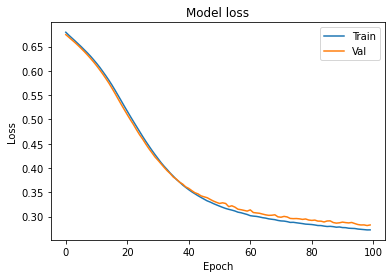

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

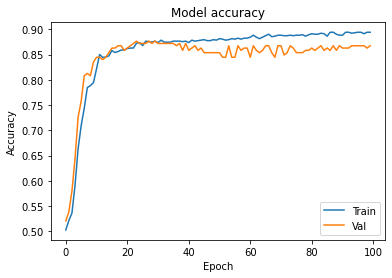

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4552 - accuracy: 0.7779 - val_loss: 0.3555 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3373 - accuracy: 0.8650 - val_loss: 0.2980 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3175 - accuracy: 0.8787 - val_loss: 0.3551 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2912 - accuracy: 0.8836 - val_loss: 0.2791 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2776 - accuracy: 0.8914 - val_loss: 0.3119 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2697 - accuracy: 0.8953 - val_loss: 0.2970 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2745 - accuracy: 0.8796 - val_loss: 0.2953 - val_accuracy: 0.8721
Epoch 

32/32 [==============================] - 1s 16ms/step - loss: 0.1526 - accuracy: 0.9413 - val_loss: 0.2963 - val_accuracy: 0.8676
Epoch 59/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1655 - accuracy: 0.9305 - val_loss: 0.3310 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1733 - accuracy: 0.9335 - val_loss: 0.3200 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1441 - accuracy: 0.9432 - val_loss: 0.2777 - val_accuracy: 0.8676
Epoch 62/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1443 - accuracy: 0.9403 - val_loss: 0.2982 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1635 - accuracy: 0.9276 - val_loss: 0.3010 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1454 - accuracy: 0.9442 - val_loss: 0.4211 - val_accuracy: 0.8493
Epoch 65/100

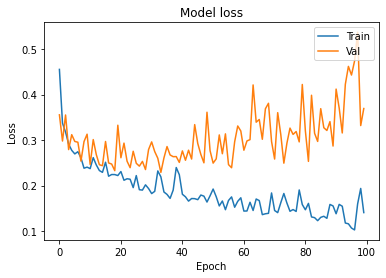

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

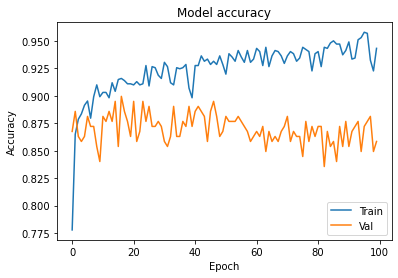

In [32]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [34]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 14.2425 - accuracy: 0.6341 - val_loss: 3.9176 - val_accuracy: 0.6438
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 1.6797 - accuracy: 0.8219 - val_loss: 0.6771 - val_accuracy: 0.8174
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.5819 - accuracy: 0.8523 - val_loss: 0.5052 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 28ms/step - loss: 0.5016 - accuracy: 0.8650 - val_loss: 0.4857 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4986 - accuracy: 0.8708 - val_loss: 0.4816 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5099 - accuracy: 0.8483 - val_loss: 0.5321 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4895 - accuracy: 0.8806 - val_loss: 0.4603 - val_accuracy: 0.9041
Epoch

32/32 [==============================] - 1s 27ms/step - loss: 0.4294 - accuracy: 0.8924 - val_loss: 0.4364 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4370 - accuracy: 0.8855 - val_loss: 0.4665 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4499 - accuracy: 0.8836 - val_loss: 0.4427 - val_accuracy: 0.8767
Epoch 61/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4295 - accuracy: 0.8933 - val_loss: 0.4241 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4223 - accuracy: 0.8875 - val_loss: 0.4241 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4363 - accuracy: 0.8885 - val_loss: 0.4409 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4466 - accuracy: 0.8787 - val_loss: 0.4324 - val_accuracy: 0.8676
Epoch 65/100

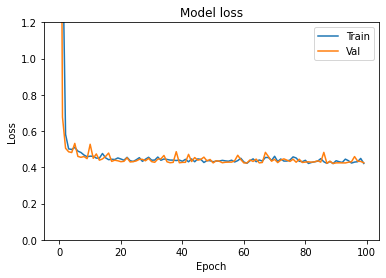

In [36]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

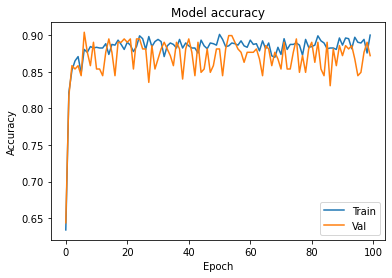

In [37]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()